In [1]:
from sklearn.datasets import make_classification
import numpy as np

In [2]:
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False ,class_sep=20)

In [3]:
import matplotlib.pyplot as plt


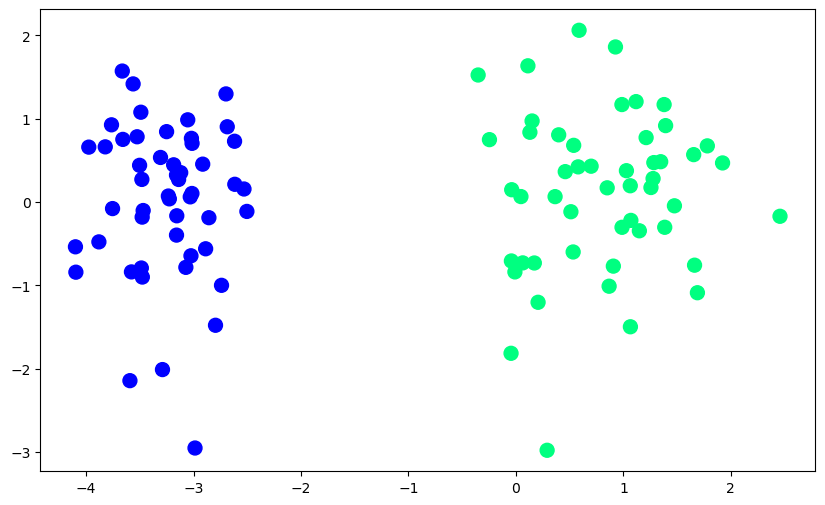

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

# Implementation using Sklearn's Class

In [6]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='none',solver="sag")
lr.fit(X,y)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [7]:
print("Coefficient:",lr.coef_)
print("Intercept:",lr.intercept_)

Coefficient: [[4.82046853 0.20651274]]
Intercept: [5.80722365]


In [8]:
m1=-(lr.coef_[0][0]/lr.coef_[0][1])
b1=-(lr.intercept_/lr.coef_[0][1])

In [9]:
x_input=np.linspace(-3,3,100)
y_input=m1*x_input+b1

# <br>

# Creating Own Class For Logistic Regression

In [11]:
def gd(X,y):
    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    lr=0.5
    
    for i in range(5000):
        y_hat=sigmoid(np.dot(X,weights))
        weights=weights+lr*(np.dot((y-y_hat),X)/X.shape[0])
        #formula
    
    return weights[1:],weights[0]

#We are using batch Gradient descent [We can aslo use minibatch gradient Descent]

In [12]:
#Defining Sigmoid Function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [13]:
coef_,intercept_=gd(X,y)

In [17]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [18]:
x_input1=np.linspace(-3,3,100)
y_input1=m*x_input1+b

# <br>

# Plotting Graph For Both Classes

(-3.0, 2.0)

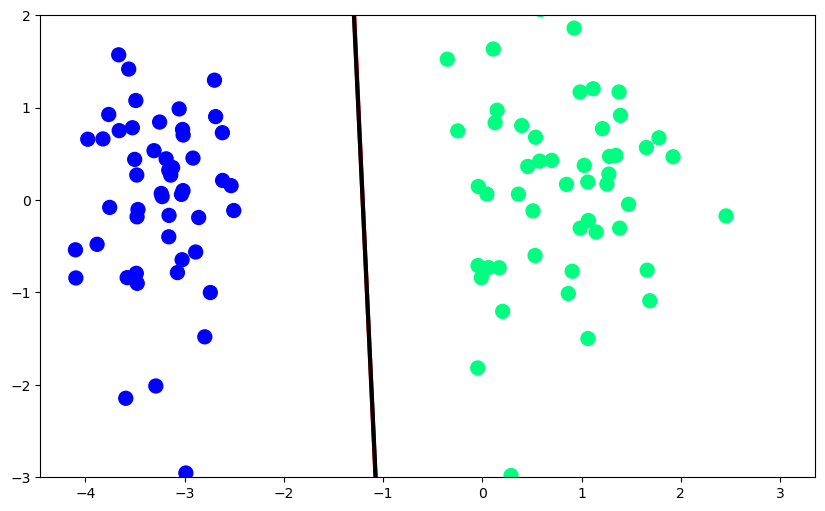

In [25]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

### From Above Graph you can see that , Line for Sklearn's Logistic Regression and Our Class logistic Regression Overlapping over each other,which means the class we create has exactly same accuracy as that of sklearn's Logistic Regression class <br> We can tune the Model By changing the number of Epochs or learning_rate in class of Gradient_Descent to achieve desired accuracy.

# Conclude